In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import comb

In [57]:
sns.set_theme(style="darkgrid")
sns.set_context("notebook")

In [58]:
# plotting barcode diversity as a function of bits
# potential barcodes is described first n choose k
# then we plot the diversity of the barcode as a function of k
# assume a k with a max of 20

In [59]:
def create_combinations_df(n_range, k_range):
    # Create empty lists to store the data
    n_values = []
    k_values = []
    combinations = []

    # Calculate combinations for each valid n,k pair
    for n in n_range:
        for k in k_range:
            if k <= n:  # Only include valid combinations where k <= n
                n_values.append(n)
                k_values.append(k)
                combinations.append(comb(n, k))

    # Create DataFrame
    df = pd.DataFrame({"n": n_values, "k": k_values, "combinations": combinations})

    return df


# Example ranges
n_range = range(18, 19, 1)  # Range for n: 0 to 5
k_range = range(0, 18, 1)  # Range for k: 0 to 5

# Create and display the DataFrame
df = create_combinations_df(n_range, k_range)
# print(df)

# # Optionally, save to CSV
# # df.to_csv('combinations.csv', index=False)

Text(0.5, 0, '~Number of infections')

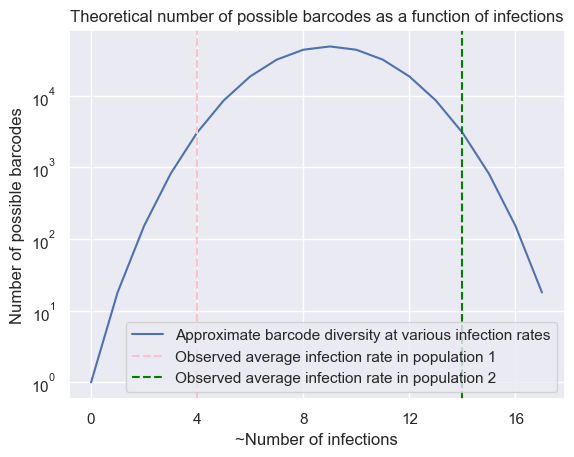

In [60]:
# plot the combinations
ax = sns.lineplot(
    x="k",
    y="combinations",
    data=df,
    label="Approximate barcode diversity at various infection rates",
)
ax.set_title("Theoretical number of possible barcodes as a function of infections")
# make the x values discrete
ax.set_xticks(range(0, 18, 4))
# make the y values discrete
# ax.set_yticks(range(0, 1000000, 100000))
# make the y axis log
ax.set_yscale("log")

# add a vertical line at k = 4
ax.axvline(
    x=4,
    color="pink",
    linestyle="--",
    label="Observed average infection rate in population 1",
)
ax.axvline(
    x=14,
    color="green",
    linestyle="--",
    label="Observed average infection rate in population 2",
)

ax.legend()

# set y axis label
ax.set_ylabel("Number of possible barcodes")
ax.set_xlabel("~Number of infections")